# Imports

In [266]:
! pip install numpy pandas matplotlib seaborn plotly scikit-learn kaleido

In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import plotly.io as pio
import kaleido
pio.renderers.default = "svg"

# Fetching Datasets

In [268]:
#Fetching FIRST DATASET
data1=pd.read_csv("DATASET_ONE")
data1.head(10)

,Unnamed: 0,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
5,5,Lucid,Air,2.8,250,610,180,620,Yes,AWD,Type 2 CCS,Sedan,F,5,105000
6,6,Volkswagen,e-Golf,9.6,150,190,168,220,No,FWD,Type 2 CCS,Hatchback,C,5,31900
7,7,Peugeot,e-208,8.1,150,275,164,420,No,FWD,Type 2 CCS,Hatchback,B,5,29682
8,8,Tesla,Model 3 Standard Range Plus,5.6,225,310,153,650,Yes,RWD,Type 2 CCS,Sedan,D,5,46380
9,9,Audi,Q4 e-tron,6.3,180,400,193,540,Yes,AWD,Type 2 CCS,SUV,D,5,55000


In [269]:
data1.drop(columns='Unnamed: 0', inplace=True)
data1['inr(10e3)'] = [price * 0.08320 for price in data1['PriceEuro']]
data1['RapidCharge'] = data1['RapidCharge'].map({'No': 0, 'Yes': 1})
data1.head()


,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,inr(10e3)
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,1,AWD,Type 2 CCS,Sedan,D,5,55480,4615.9360
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,0,RWD,Type 2 CCS,Hatchback,C,5,30000,2496.0000
2,Polestar,2,4.7,210,400,181,620,1,AWD,Type 2 CCS,Liftback,D,5,56440,4695.8080
3,BMW,iX3,6.8,180,360,206,560,1,RWD,Type 2 CCS,SUV,D,5,68040,5660.9280
4,Honda,e,9.5,145,170,168,190,1,RWD,Type 2 CCS,Hatchback,B,4,32997,2745.3504


In [270]:
#Fetching SECOND DATASET
data2=pd.read_csv("DATASET_SECOND.csv")
data2.sample(5)

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
5,28,Salaried,Married,Graduate,3,Yes,Yes,No,900000,0,900000,Baleno,700000
29,36,Salaried,Married,Post Graduate,2,No,No,Yes,1800000,900000,2700000,SUV,1600000
34,42,Salaried,Married,Graduate,4,Yes,Yes,No,2100000,0,2100000,Ciaz,1100000
49,36,Salaried,Married,Graduate,3,Yes,No,Yes,2200000,900000,3100000,Creata,1500000
57,27,Salaried,Single,Post Graduate,0,No,No,No,1100000,0,1100000,Baleno,700000


# Exploratory Data Analysis (EDA)

In [271]:
data1.shape

(103, 15)

In [272]:
data2.shape

(99, 13)

In [273]:
print("FIRST DATASET")
print(data1.info())
print("SECOND DATASET")
print(data2.info())

FIRST DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    int64  
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
 14  inr(10e3)        103 non-null    float64
dtypes: float64(2), int64(7), object(6)
memory usage: 12.2+ KB
None
SECOND DATASET
<class 'pandas.c

In [274]:
data1.isnull().sum()

,0
Brand,0
Model,0
AccelSec,0
TopSpeed_KmH,0
Range_Km,0
Efficiency_WhKm,0
FastCharge_KmH,0
RapidCharge,0
PowerTrain,0
PlugType,0


In [275]:
data2.isnull().sum()

,0
Age,0
Profession,0
Marrital Status,0
Education,0
No of Dependents,0
Personal loan,0
House Loan,0
Wife Working,0
Salary,0
Wife Salary,0


In [276]:
# getting a statistical summary of the dataset
summary_stats=data1.describe()
summary_stats

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,Seats,PriceEuro,inr(10e3)
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,444.271845,0.747573,4.883495,55811.563107,4643.522050
std,3.017430,43.573030,126.014444,29.566839,203.949253,0.436529,0.795834,34134.665280,2840.004151
min,2.100000,123.000000,95.000000,104.000000,170.000000,0.000000,2.000000,20129.000000,1674.732800
25%,5.100000,150.000000,250.000000,168.000000,260.000000,0.500000,5.000000,34429.500000,2864.534400
50%,7.300000,160.000000,340.000000,180.000000,440.000000,1.000000,5.000000,45000.000000,3744.000000
75%,9.000000,200.000000,400.000000,203.000000,555.000000,1.000000,5.000000,65000.000000,5408.000000
max,22.400000,410.000000,970.000000,273.000000,940.000000,1.000000,7.000000,215000.000000,17888.000000


In [277]:
data2.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [278]:
numeric_data1 = data1.select_dtypes(include=[np.number])
numeric_data1.corr()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,Seats,PriceEuro,inr(10e3)
AccelSec,1.000000,-0.786195,-0.677062,-0.382904,-0.733559,-0.292518,-0.175335,-0.627174,-0.627174
TopSpeed_KmH,-0.786195,1.000000,0.746662,0.355675,0.785218,0.220113,0.126470,0.829057,0.829057
Range_Km,-0.677062,0.746662,1.000000,0.313077,0.723714,0.251910,0.300163,0.674844,0.674844
Efficiency_WhKm,-0.382904,0.355675,0.313077,1.000000,0.321925,0.013894,0.301230,0.396705,0.396705
FastCharge_KmH,-0.733559,0.785218,0.723714,0.321925,1.000000,0.225863,0.193364,0.667873,0.667873
RapidCharge,-0.292518,0.220113,0.251910,0.013894,0.225863,1.000000,0.196721,0.199737,0.199737
Seats,-0.175335,0.126470,0.300163,0.301230,0.193364,0.196721,1.000000,0.020920,0.020920
PriceEuro,-0.627174,0.829057,0.674844,0.396705,0.667873,0.199737,0.020920,1.000000,1.000000
inr(10e3),-0.627174,0.829057,0.674844,0.396705,0.667873,0.199737,0.020920,1.000000,1.000000


In [279]:
numeric_data1.corr()["TopSpeed_KmH"]

,TopSpeed_KmH
AccelSec,-0.786195
TopSpeed_KmH,1.000000
Range_Km,0.746662
Efficiency_WhKm,0.355675
FastCharge_KmH,0.785218
RapidCharge,0.220113
Seats,0.126470
PriceEuro,0.829057
inr(10e3),0.829057


In [280]:
numeric_data2 = data2.select_dtypes(include=[np.number])
numeric_data2.corr()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
Age,1.000000,0.543675,0.656442,0.288546,0.587082,0.376661
No of Dependents,0.543675,1.000000,0.273921,0.102010,0.234379,0.088822
Salary,0.656442,0.273921,1.000000,0.347934,0.841545,0.547630
Wife Salary,0.288546,0.102010,0.347934,1.000000,0.799238,0.635858
Total Salary,0.587082,0.234379,0.841545,0.799238,1.000000,0.717442
Price,0.376661,0.088822,0.547630,0.635858,0.717442,1.000000


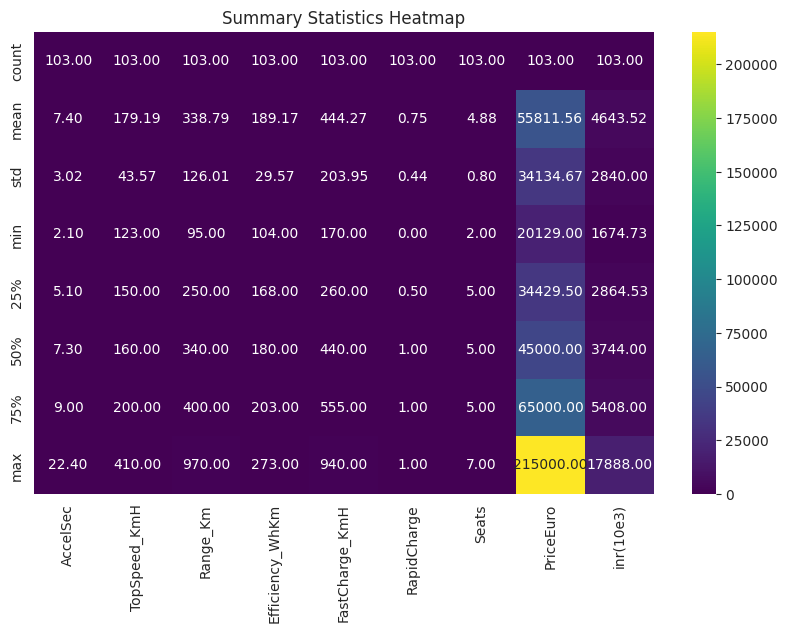

In [281]:
plt.figure(figsize=(10, 6))
sns.heatmap(summary_stats, annot=True, cmap='viridis', fmt=".2f")
plt.title('Summary Statistics Heatmap')
plt.show()

<ipython-input-282-80f741a83a27>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




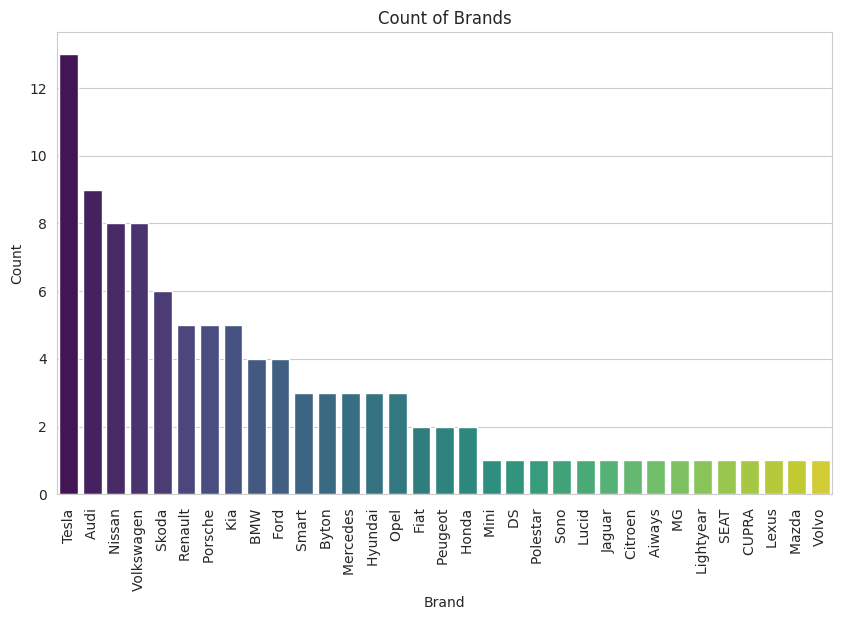

In [282]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data1, x='Brand', order=data1['Brand'].value_counts().index, palette='viridis')

plt.xticks(rotation=90)
plt.title('Count of Brands')
plt.xlabel('Brand')

plt.ylabel('Count')

plt.show()

In [283]:
pio.renderers.default = "colab"

fig = px.bar(data1, x='PriceEuro', y='Brand', title='Car Price', color='Brand', labels={'PriceEuro':'PriceEuro','Brand':'Car Brands'})
pio.show(fig)

In [284]:
fig = px.bar(data1, x='Brand', y='TopSpeed_KmH', color='Brand')

fig.update_layout(
    title='Which car has the top speed?',
    xaxis_title='Car Brand',
    yaxis_title='Top Speed (km/h)'
)

fig.show()

In [285]:
fig = px.bar(data1, x='Brand', y='AccelSec',color='Brand', title='Which car has fastest acceleration?', labels={'Brand':'Car Brands', 'AccelSec':'Acceleration (s)'})

pio.show(fig)


In [286]:
fig = px.bar(data1,x='Range_Km', y = 'PowerTrain', color = 'PowerTrain',text='PowerTrain')
pio.show(fig)

In [287]:
fig = px.pie(data1,names='Brand', values='inr(10e3)')
pio.show(fig)

# EDA  of 2nd Dataset

In [288]:
data2.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [289]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [290]:
summary_stats1=data2.describe()
summary_stats1

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [291]:
data2['Marrital Status'].value_counts()

,count
Marrital Status,
Married,84
Single,15


In [292]:
for column in ["Profession", "Marrital Status", "Education", "Make"]:
    print(column, ":", data2[column].unique())

Profession : ['Salaried' 'Business']
Marrital Status : ['Single' 'Married']
Education : ['Post Graduate' 'Graduate']
Make : ['i20' 'Ciaz' 'Duster' 'City' 'SUV' 'Baleno' 'Verna' 'Luxuray' 'Creata']


<ipython-input-293-c8fd40e9b943>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




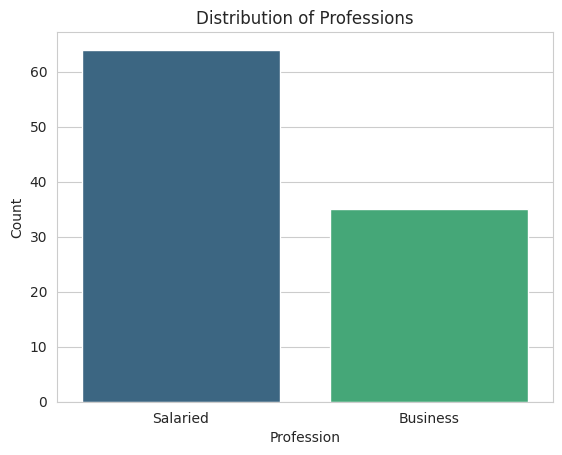

In [293]:
sns.countplot(data=data2, x="Profession", palette="viridis")

plt.title("Distribution of Professions")
plt.xlabel("Profession")
plt.ylabel("Count")

plt.show()

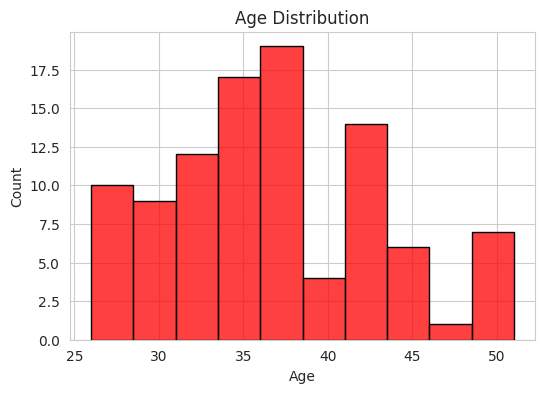

In [294]:
plt.figure(figsize=(6, 4))
sns.histplot(data=data2, x="Age",color='red',edgecolor='black', bins=10)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

<ipython-input-295-5b1ace911aaf>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




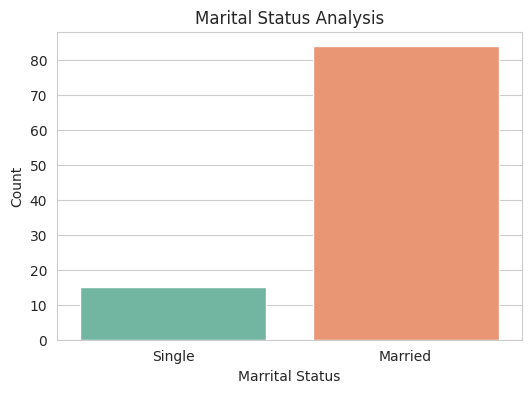

In [295]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data2, x="Marrital Status", palette="Set2")

plt.title("Marital Status Analysis")
plt.xlabel("Marrital Status")
plt.ylabel("Count")
plt.show()

<ipython-input-296-0bde49a1b218>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




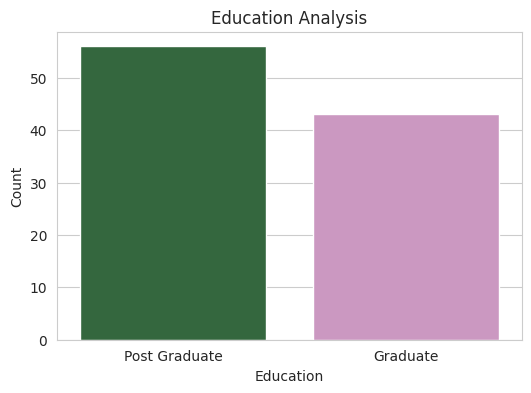

In [296]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data2, x="Education",palette="cubehelix")
plt.title("Education Analysis")
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

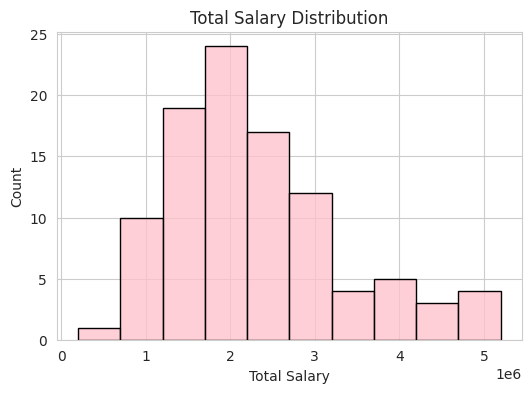

In [297]:
plt.figure(figsize=(6, 4))
sns.histplot(data=data2, x="Total Salary",color='pink',edgecolor='black', bins=10)
plt.title("Total Salary Distribution")
plt.xlabel("Total Salary")
plt.ylabel("Count")
plt.show()

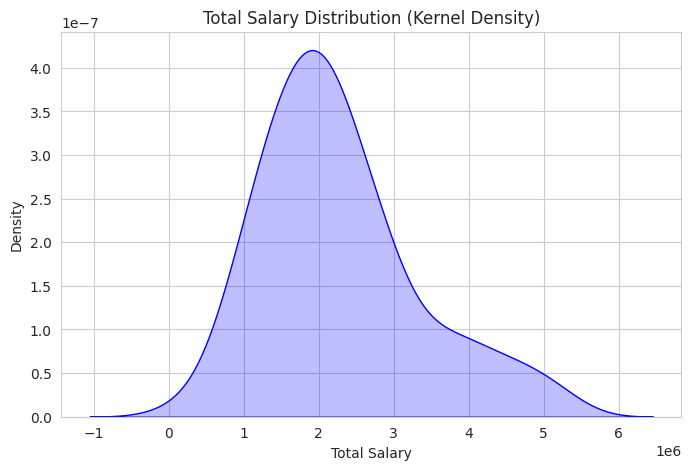

In [298]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=data2, x='Total Salary', color='blue', fill=True)
plt.title('Total Salary Distribution (Kernel Density)')
plt.xlabel('Total Salary')
plt.ylabel('Density')
plt.show()

<ipython-input-299-1db84a0cf617>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




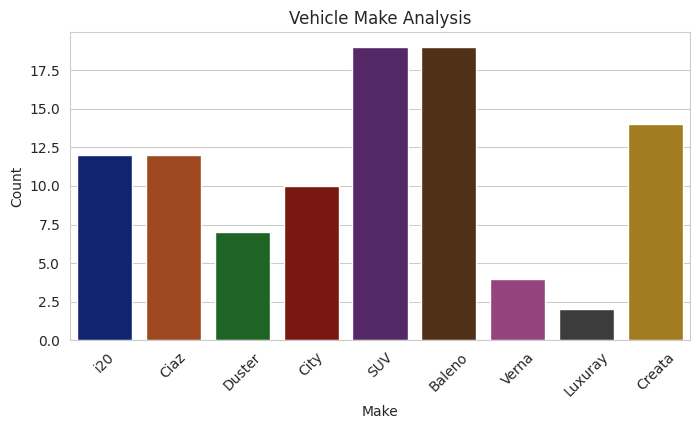

In [299]:
plt.figure(figsize=(8, 4))
sns.countplot(data=data2, x='Make',palette="dark")
plt.title('Vehicle Make Analysis')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

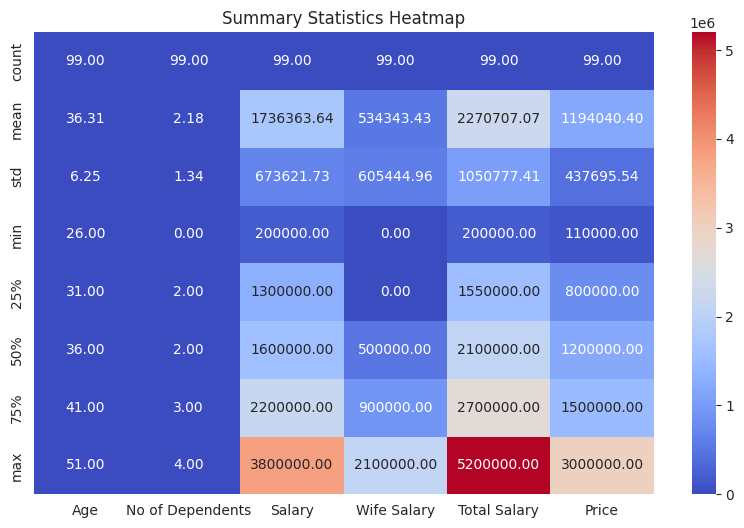

In [300]:
plt.figure(figsize=(10, 6))
sns.heatmap(summary_stats1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Summary Statistics Heatmap')
plt.show()

In [301]:
X=data1[['PriceEuro','Range_Km']].values

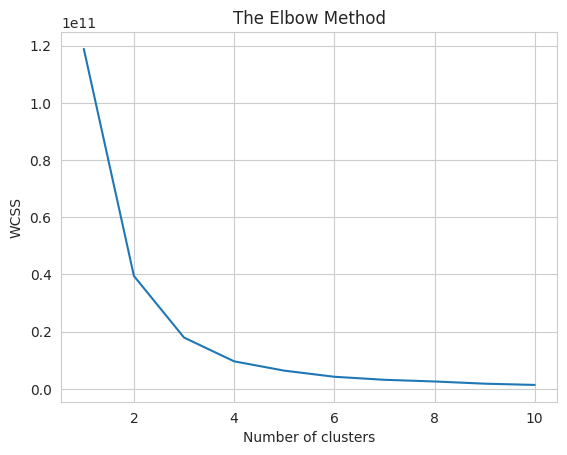

In [302]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [303]:
kmeans = KMeans(n_clusters=3, init='k-means++',random_state=42)
clusters = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [304]:
data1['Cluster'] = clusters

In [305]:
clusters

array([0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2,
       0, 1, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 2, 1, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2], dtype=int32)

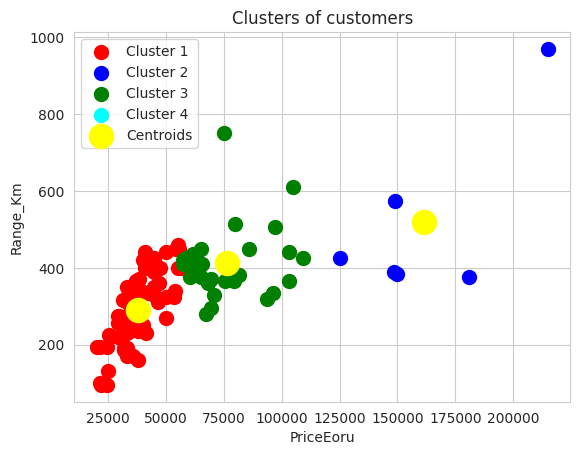

In [306]:
plt.scatter(X[clusters == 0, 0], X[clusters == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[clusters == 1, 0], X[clusters == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[clusters == 2, 0], X[clusters == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[clusters == 3, 0], X[clusters == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('PriceEoru')
plt.ylabel('Range_Km')
plt.legend()
plt.show()

In [307]:
data1['ClusterLabel'] = clusters+1

In [308]:
data1

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,inr(10e3),Cluster,ClusterLabel
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,1,AWD,Type 2 CCS,Sedan,D,5,55480,4615.9360,0,1
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,0,RWD,Type 2 CCS,Hatchback,C,5,30000,2496.0000,0,1
2,Polestar,2,4.7,210,400,181,620,1,AWD,Type 2 CCS,Liftback,D,5,56440,4695.8080,0,1
3,BMW,iX3,6.8,180,360,206,560,1,RWD,Type 2 CCS,SUV,D,5,68040,5660.9280,2,3
4,Honda,e,9.5,145,170,168,190,1,RWD,Type 2 CCS,Hatchback,B,4,32997,2745.3504,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,1,FWD,Type 2 CCS,Hatchback,C,5,45000,3744.0000,0,1
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,1,AWD,Type 2 CCS,SUV,E,5,96050,7991.3600,2,3
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,1,AWD,Type 2 CCS,Hatchback,C,5,50000,4160.0000,0,1
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,1,AWD,Type 2 CCS,Hatchback,C,5,65000,5408.0000,2,3


In [309]:
drop=['PowerTrain','PlugType','BodyStyle','Segment','Model','FastCharge_KmH']
data1=data1.drop(drop,axis=1)

In [310]:
lb=LabelEncoder()

In [311]:
data1['Brand']=lb.fit_transform(data1['Brand'])

In [312]:
data1['RapidCharge'].replace('Yes',1,inplace = True)
data1['RapidCharge'].replace('No',0,inplace = True)

In [313]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    int64  
 1   AccelSec         103 non-null    float64
 2   TopSpeed_KmH     103 non-null    int64  
 3   Range_Km         103 non-null    int64  
 4   Efficiency_WhKm  103 non-null    int64  
 5   RapidCharge      103 non-null    int64  
 6   Seats            103 non-null    int64  
 7   PriceEuro        103 non-null    int64  
 8   inr(10e3)        103 non-null    float64
 9   Cluster          103 non-null    int32  
 10  ClusterLabel     103 non-null    int32  
dtypes: float64(2), int32(2), int64(7)
memory usage: 8.2 KB


In [314]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)

In [315]:
cluster_means = data1.groupby('Cluster').mean()

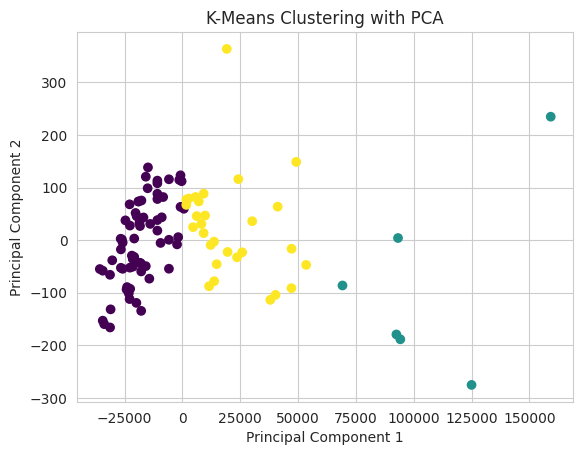

In [316]:
plt.scatter(pca_data[:,0], pca_data[:,1], c=clusters, cmap='viridis',label="centroids")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with PCA')
plt.show()


# 2nd data K-Mean

In [317]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [318]:
data_encoded = pd.get_dummies(data2, columns=['Profession', 'Marrital Status', 'Education', 'Personal loan', 'House Loan', 'Wife Working', 'Make'])


In [319]:
data2.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [320]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [321]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_encoded.drop(['Price'], axis=1))


In [322]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

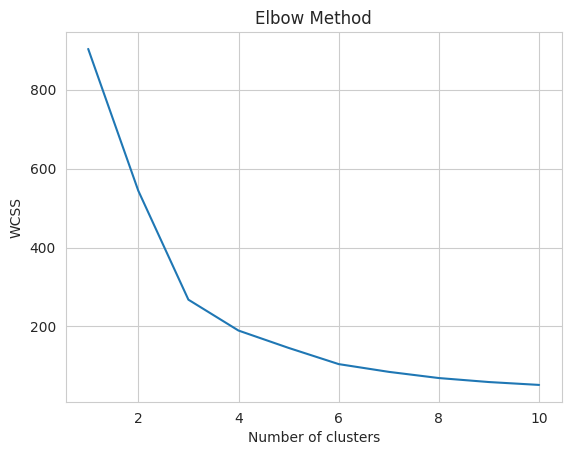

In [323]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [324]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(pca_data)

In [325]:
data2['Cluster'] = clusters


In [326]:
clusters

array([1, 2, 2, 0, 0, 2, 0, 1, 1, 2, 0, 2, 0, 1, 2, 0, 1, 1, 1, 1, 0, 2,
       0, 0, 2, 0, 2, 1, 2, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 0, 2, 1, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1,
       2, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 1, 0,
       0, 2, 1, 0, 2, 1, 1, 0, 2, 0, 2], dtype=int32)

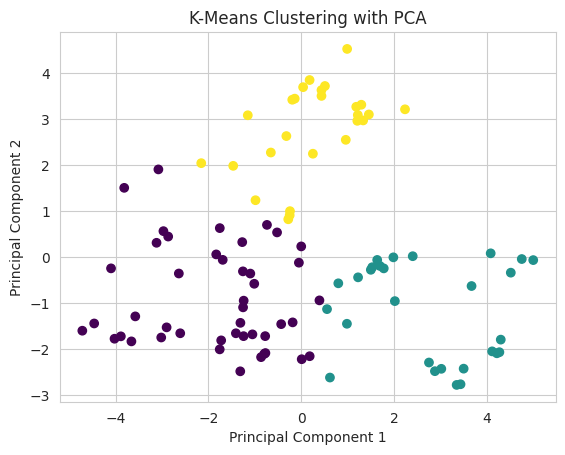

In [327]:
plt.scatter(pca_data[:,0], pca_data[:,1], c=clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with PCA')
plt.show()